## Урок 1. ДЗ 
## Теория вероятности
### Урок 3. Описательная статистика. Качественные и количественные характеристики популяции. Графическое представление данных

In [406]:
import numpy as np
import pandas as pd
from math import factorial
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**ЗАДАЧА 1.**\
1.Даны значения зарплат из выборки выпускников: 100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150.\
Посчитать (желательно без использования статистических методов наподобие std, var, mean)
-  среднее арифметическое,
-  среднее квадратичное отклонение,
-  смещенную и несмещенную оценки дисперсий для данной выборки.
-  Сделать графическую интерпретацию данных, проанализовать выбросы, посчитать квартили и интерквартильное расстояние

**решение:** посчитать **среднее арифметическое** без использования статистических методов наподобие std, var, mean

$$M(X) = \frac{1}{n} \sum\limits_{i=1}^{n} x_i$$

где: x — значение, n — количество наблюдений.



In [407]:
# вариант1(python)
sample = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150]
sum = 0
for i in range(len(sample)):
    sum += sample[i]
print(f'Ответ:среднее арифметическое: {sum/len(sample) :.2f}')

Ответ:среднее арифметическое: 65.30


In [408]:
# вариант2(pandas- создание dataframe)
df = pd.DataFrame(sample)
print(df)

      0
0   100
1    80
2    75
3    77
4    89
5    33
6    45
7    25
8    65
9    17
10   30
11   24
12   57
13   55
14   70
15   75
16   65
17   84
18   90
19  150


In [409]:
print(f'Ответ:Среднее арифметическое: {df.sum()/df.count()}')

Ответ:Среднее арифметическое: 0    65.3
dtype: float64


In [410]:
# Cреднее арифметическое вариант 3.
df_mean = df.sum()/df.size
print(f'Ответ:Среднее арифметическое: {df_mean}')

Ответ:Среднее арифметическое: 0    65.3
dtype: float64


**решение:** Посчитаем **cреднее квадратичное** отклонение, без использования статистических методов наподобие std, var, mean\
(показывает насколько сильно отклонения могут быть разбросаны относительно среднего)
$$\sigma = \sqrt{\frac{\sum\limits_{i=1}^{n} (x_i - \overline{x})^2}{n}}$$

где: $$\overline{x}$$ — среднее значение, n — количество наблюдений.

In [411]:
# # Cреднее квадратичное отклонение вариант 1.
std = np.sqrt(((df - df.mean())**2).sum() / df.count())
print(f'Ответ:Среднее квадратичное отклонение: {std}')

Ответ:Среднее квадратичное отклонение: 0    30.823854
dtype: float64


In [412]:
# Cреднее квадратичное отклонение вариант 2.
sigma = (np.sum((df - df_mean)**2) / df.size)**0.5
sigma

0    30.823854
dtype: float64

In [413]:
#среднее квадратичное отклонение с помощью метода std:
df.std(ddof=0)

0    30.823854
dtype: float64

In [414]:
#среднее квадратичное отклонение с помощью метода std:
df.std(ddof=1)

0    31.624607
dtype: float64

**решение:**

посчитать **смещенную оценки дисперсий**  для данной выборки. без использования статистических методов наподобие std, var, mean
$$\sigma^2 = \frac{\sum\limits_{i=1}^{n} (x_i - \overline{x})^2}{n}$$

где: x — значение n — количество наблюдений, $$\overline{x}$$ — среднее значение.

посчитать **не смещенную оценки дисперсий**  для данной выборки. без использования статистических методов наподобие std, var, mean
$$\sigma^2_{несмещ.} = \frac{\sum\limits_{i=1}^{n} (x_i - \overline{x})^2}{n - 1}$$
где: x — значение n — количество наблюдений, $$\overline{x}$$ — среднее значение.


Дисперсия = среднему квадратичному отклонению, возведенному в квадрат

In [415]:
#  смещенная оценка дисперсии
m = 65.3 
n=len(sample)
sum_num = 0
for num in sample:
  sum_num+= (num - m)**2
print(sum_num/n)

950.11


In [416]:
# не смещенная оценка дисперсии
m = 65.3 
n=len(sample)-1
sum_num = 0
for num in sample:
  sum_num+= (num - m)**2
print(sum_num/n)

1000.1157894736842


In [417]:
#  смещенная оценка дисперсии
((df - df.mean())**2).sum() / (df.count())

# np.sum((df - df_mean)**2) / df.size

0    950.11
dtype: float64

In [418]:
# не смещенная оценка дисперсии
((df - df.mean())**2).sum() / (df.count() - 1)

# np.sum((df - df_mean)**2) / (df.size - 1)

0    1000.115789
dtype: float64

In [419]:
# смещенную оценку дисперсии, методом var
df.var(ddof=0)

0    950.11
dtype: float64

In [420]:
# не смещенная оценка дисперсии, методом var
df.var(ddof=1)

0    1000.115789
dtype: float64

**решение:**

Сделать:
- графическую интерпретацию данных\
- проанализовать выбросы\
- посчитать квартили и интерквартильное расстояние

In [421]:
df.columns

RangeIndex(start=0, stop=1, step=1)

In [422]:
# сортировка датафрейма
sorted_df = df.sort_values(0)
print(sorted_df)

      0
9    17
11   24
7    25
10   30
5    33
6    45
13   55
12   57
8    65
16   65
14   70
2    75
15   75
3    77
1    80
17   84
4    89
18   90
0   100
19  150


In [423]:
# сортировка списка
sample.sort()
sample

[17,
 24,
 25,
 30,
 33,
 45,
 55,
 57,
 65,
 65,
 70,
 75,
 75,
 77,
 80,
 84,
 89,
 90,
 100,
 150]

In [424]:
# посчитать квартили и интерквартильное расстояние

# кол-во элементов чётное, поэтому медианой в этой выборке будет среднее арифметическое двух центральных элементов:65 и 70
# медианы левой и правой половин — это, соответственно первый (или нижний 33,45) и третий (или верхний 80,84) квартили:
# Q1=(33+45)/2 = 39
# Q2=(65+70)/2 = 67.5 
# Q3=(80+84)/2 = 82
# Интерквартильный размах — это разность между третьим и первым квартилями: 82-39=43

In [425]:
# посчитать квартили
sorted_df.describe()

,0
count,20.000000
mean,65.300000
std,31.624607
min,17.000000
25%,42.000000
50%,67.500000
75%,81.000000
max,150.000000


In [426]:
# посчитать квартили
sorted_df.quantile([0.25,0.5,0.75])

,0
0.25,42.0
0.50,67.5
0.75,81.0


In [427]:
# посчитать квартили
np.percentile(sorted_df,[25, 50, 75])

array([42. , 67.5, 81. ])

In [428]:
q75, q25 = np.percentile(sorted_df, [75,25])
iqr = q75 - q25
iqr

39.0

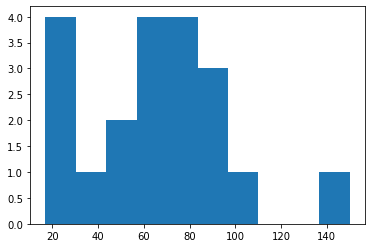

In [429]:
# построим гистограмму. По умолчанию данные разбиваются на 10 частей высота столбиков соответствует количеству наблюдений в бине:
plt.hist(df)
plt.show()

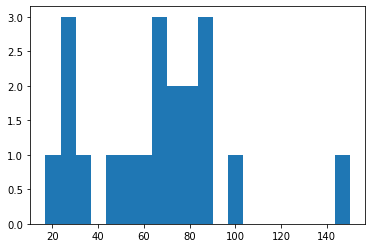

In [430]:
plt.hist(sorted_df, bins = 20)
plt.show()

построение бокс-графиков различными методами:

<AxesSubplot:>

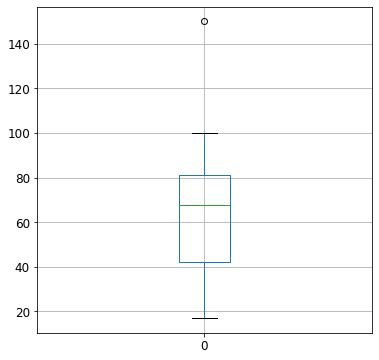

In [431]:
pd.plotting.boxplot\
(df, column=None, by=None, ax=None, fontsize=12, rot=0, grid=True, figsize=(6, 6), layout=None, return_type=None)

<AxesSubplot:>

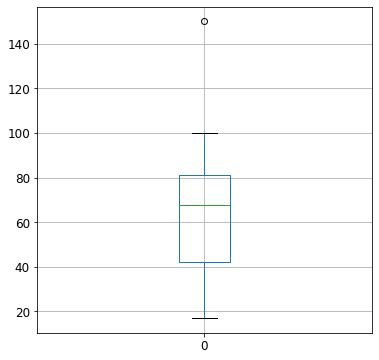

In [432]:
df.boxplot\
(column=None, by=None, ax=None, fontsize=12, rot=0, grid=True, figsize=(6, 6), layout=None, return_type=None, backend=None)

In [433]:
import seaborn as sns

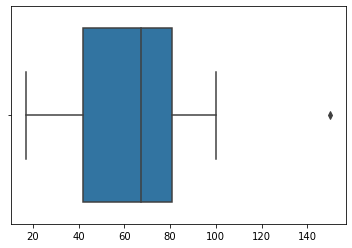

In [434]:
sns.boxplot(sample)
plt.show()

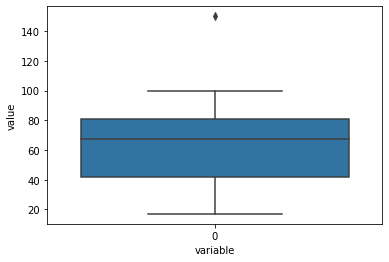

In [435]:
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.show()

на графике видим 'выброс' больше третьей квартили

In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       20 non-null     int64
dtypes: int64(1)
memory usage: 288.0 bytes


In [437]:
df.value_counts(normalize=True).to_frame()

,0
0,
75,0.10
65,0.10
17,0.05
100,0.05
90,0.05
89,0.05
84,0.05
80,0.05
77,0.05


In [438]:
df.value_counts().loc[lambda x : x > 1]

75    2
65    2
dtype: int64

In [439]:
df.loc()

<AxesSubplot:>

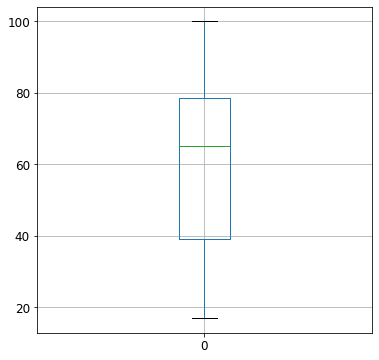

In [440]:
# Можно использовать метод numpy.percentile () для расчета значений Q1 и Q3 и заменить выбросы (с numpy.nan) на нулевые значения.
# ИЗБАВИТСЯ ОТ ВЫБРОСОВ
for x in df:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan
df.boxplot(column=None, by=None, ax=None, fontsize=12, rot=0, grid=True, figsize=(6, 6), layout=None, return_type=None, backend=None)

## **ЗАДАЧА 2.**\
В первом ящике находится 8 мячей, из которых 5 - белые.\
Во втором ящике - 12 мячей, из которых 5 - белые.\
Из первого ящика вытаскивают случайным образом - 2 мяча, из второго - 4.

- **Какова вероятность того, что 3 мяча белые?**

### решение:
#### первый ящик
n1 = 8  - всего мячей\
v1 = 5  - белых мячей\
b1 = 3  - чёрных мячей\
a1 = 2  - случайный выбор мячей

#### второй ящик
n2 = 12 - всего мячей\
v2 = 5 - белых мячей\
b2 = 7 - чёрных мячей\
a2 = 4 - случайный выбор мячей

из выбранных мячей 3 мяча белыми могут оказатся в 18 возможных вариантах:

(бб)(чччб) + (бб)(ччбч) + (бб)(чбчч) + (бб)(бччч) +\
(бч)(ччбб) + (бч)(чбчб) + (бч)(бччб) + (бч)(бчбч) + (бч)(ббчч) +\
(чб)(ччбб) + (чб)(чбчб) + (чб)(бччб) + (чб)(бчбч) + (чб)(ббчч) +\
(чч)(чббб) + (чч)(бчбб) + (чч)(ббчб) + (чч)(бббч)




*разделение на блоки для самопроверки*

(5/8)*(4/7)   * (7/12)*(6/11)*(5/10)*(2/9) +\
(5/8)*(4/7)   * (7/12)*(6/11)*(5/10)*(5/9) +\
(5/8)*(4/7)   * (7/12)*(5/11)*(6/10)*(5/9) +\
(5/8)*(4/7)   * (5/12)*(7/11)*(6/10)*(5/9) +

(5/8)*(3/7)   * (7/12)*(6/11)*(5/10)*(4/9) +\
(5/8)*(3/7)   * (7/12)*(5/11)*(6/10)*(4/9) +\
(5/8)*(3/7)   * (5/12)*(7/11)*(6/10)*(4/9) +\
(5/8)*(3/7)   * (5/12)*(7/11)*(4/10)*(6/9) +\
(5/8)*(3/7)   * (5/12)*(4/11)*(7/10)*(6/9) +

(3/8)*(5/7)   * (7/12)*(6/11)*(5/10)*(4/9) +\
(3/8)*(5/7)   * (7/12)*(5/11)*(6/10)*(4/9) +\
(3/8)*(5/7)   * (5/12)*(7/11)*(6/10)*(4/9) +\
(3/8)*(5/7)   * (5/12)*(7/11)*(4/10)*(6/9) +\
(3/8)*(5/7)   * (5/12)*(4/11)*(7/10)*(6/9) +

(3/8)*(2/7)   * (7/12)*(5/11)*(4/10)*(3/9) +\
(3/8)*(2/7)   * (5/12)*(7/11)*(4/10)*(3/9) +\
(3/8)*(2/7)   * (5/12)*(4/11)*(7/10)*(3/9) +\
(3/8)*(2/7)   * (5/12)*(4/11)*(3/10)*(7/9)

In [441]:
P=\
(5/8)*(4/7)*(7/12)*(6/11)*(5/10)*(2/9)+\
(5/8)*(4/7)*(7/12)*(6/11)*(5/10)*(5/9)+\
(5/8)*(4/7)*(7/12)*(5/11)*(6/10)*(5/9)+\
(5/8)*(4/7)*(5/12)*(7/11)*(6/10)*(5/9)+\
(5/8)*(3/7)*(7/12)*(6/11)*(5/10)*(4/9)+\
(5/8)*(3/7)*(7/12)*(5/11)*(6/10)*(4/9)+\
(5/8)*(3/7)*(5/12)*(7/11)*(6/10)*(4/9)+\
(5/8)*(3/7)*(5/12)*(7/11)*(4/10)*(6/9)+\
(5/8)*(3/7)*(5/12)*(4/11)*(7/10)*(6/9)+\
(3/8)*(5/7)*(7/12)*(6/11)*(5/10)*(4/9)+\
(3/8)*(5/7)*(7/12)*(5/11)*(6/10)*(4/9)+\
(3/8)*(5/7)*(5/12)*(7/11)*(6/10)*(4/9)+\
(3/8)*(5/7)*(5/12)*(7/11)*(4/10)*(6/9)+\
(3/8)*(5/7)*(5/12)*(4/11)*(7/10)*(6/9)+\
(3/8)*(2/7)*(7/12)*(5/11)*(4/10)*(3/9)+\
(3/8)*(2/7)*(5/12)*(7/11)*(4/10)*(3/9)+\
(3/8)*(2/7)*(5/12)*(4/11)*(7/10)*(3/9)+\
(3/8)*(2/7)*(5/12)*(4/11)*(3/10)*(7/9)

print(f'Ответ:Вероятность того, что 3 мяча белые: {P :.2f}')

Ответ:Вероятность того, что 3 мяча белые: 0.31


**ЗАДАЧА 3.**\
В университет на факультеты A и B поступило равное количество студентов,\
а на факультет C студентов поступило столько же, сколько на A и B вместе.\

Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8.\
Для студента факультета B эта вероятность равна 0.7\
а для студента факультета C 0.9.

Студент сдал первую сессию.Какова вероятность, что он учится:
- a). на факультете A 
- б). на факультете B 
- в). на факультете C

**решение**

In [442]:
# A=x, B=x, C=2x.

x = 1/4

# - посчитаем общую вероятность сдачи для всех трёх факультетов:
p = x*0.8 + x*0.7 + 2*x*0.9 
p

0.825

In [443]:
print(f'Вероятность сдачи для факультете A: {(x*0.8)/p:.2f}')
print(f'Вероятность сдачи для факультете B: {(x*0.7)/p:.2f}')
print(f'Вероятность сдачи для факультете C: {(2*x*0.9)/p:.2f}')

Вероятность сдачи для факультете A: 0.24
Вероятность сдачи для факультете B: 0.21
Вероятность сдачи для факультете C: 0.55


**ЗАДАЧА 4.**\
Устройство состоит из трех деталей.\
Bероятность выйти из строя в первый месяц:\
для первой детали  - 0.1\
для второй детали  - 0.2\
для третьей детали - 0.25

Какова вероятность того, что в первый месяц выйдут из строя:
- а). все детали
- б). только две детали
- в). хотя бы одна деталь
- г). от одной до двух деталей?

количество деталей: n = 3 


первая деталь вероятность выхода из строя: p1=P(A1) = 0.1\
вторая деталь вероятность выхода из строя: p2=P(A2) = 0.2\
третья деталь вероятность выхода из строя: p3=P(A3) = 0.25

первая деталь вероятность НЕ выхода из строя: q1=1−p1 = 0.9\
вторая деталь вероятность НЕ выхода из строя: q2=1−p2 = 0.8\
третья деталь вероятность НЕ выхода из строя: q3=1−p3 = 0.75

Ни одна деталь не отказала:
$$P(X_0)=P\left(\overline{A_1} \cdot \overline{A_2} \cdot \overline{A_3}\right)=  P\left(\overline{A_1}\right) \cdot  P\left(\overline{A_2}\right) \cdot  P\left(\overline{A_3}\right)= q_1 \cdot q_2 \cdot q_3.  \qquad $$

Одна деталь отказала, две - нет:

$$P(X_1)= \\ = P(A_1) \cdot P\left(\overline{A_2} \right) \cdot P\left(\overline{A_3} \right) +  P\left(\overline{A_1}\right) \cdot P(A_2) \cdot P\left(\overline{A_3} \right) +  P\left(\overline{A_1} \right) \cdot P\left(\overline{A_2} \right) \cdot P(A_3)=\\
 = p_1 \cdot q_2 \cdot q_3 + q_1 \cdot p_2 \cdot q_3 +  q_1 \cdot q_2 \cdot p_3. \qquad$$

Две детали отказали, одна - нет:
 
$$P(X_2)= \\ 
= P(A_1) \cdot P(A_2) \cdot P\left(\overline{A_3} \right) +  P(A_1)\cdot P\left(\overline{A_2} \right) \cdot P(A_3)  +  P\left(\overline{A_1} \right) \cdot P(A_2) \cdot P(A_3)=\\
= p_1 \cdot p_2 \cdot q_3 + p_1 \cdot q_2 \cdot p_3 +  q_1 \cdot p_2 \cdot p_3. \qquad$$

Три детали отказали:
$$P(X_3)=P(A_1 \cdot A_2 \cdot A_3)  =  P(A_1) \cdot P(A_2) \cdot P(A_3) =  p_1 \cdot p_2 \cdot p_3. \qquad$$

In [444]:
p1=0.1
p2=0.2
p3=0.25
q1=0.9
q2=0.8
q3=0.75

print(f'Три детали отказали: {𝑝1*𝑝2*𝑝3 :.2f}')
print(f'Две детали отказали, одна - нет: {𝑝1*𝑝2*𝑞3+𝑝1*𝑞2*𝑝3+𝑞1*𝑝2*𝑝3 :.2f}')
print(f'Одна деталь отказала, две - нет: {𝑝1*𝑞2*𝑞3+𝑞1*𝑝2*𝑞3+𝑞1*𝑞2*𝑝3 :.2f}')
print(f'Ни одна деталь не отказала: {𝑞1*𝑞2*𝑞3 :.2f}')

Три детали отказали: 0.01
Две детали отказали, одна - нет: 0.08
Одна деталь отказала, две - нет: 0.38
Ни одна деталь не отказала: 0.54
